<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Optimización</div><br>
    <div style="font-size: x-large; color:gray">Práctica de programación de algoritmos</div><br>
    <div style="font-size: large">María Barroso y Gloria del Valle</div><br></div><hr> 
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

# Tarea 1
- Codificar el método de búsqueda Dicotómica.
- Codificar el método de búsqueda de la Sección Áurea.

In [3]:
from opt_search import dichotomic_search, golden_search

## Búsqueda Dicotómica

A continuación, se muestra a través de un ejemplo, el problema de minimización de búsqueda dicotómica utilizando la función *dichotomic_search* implementado en *search_methods.py*.

Se quiere minimizar la función 

$$f_1(x) = 3x^2-1$$

cuyo mínimo sabemos que se alcanza en $f_1(x^*)=-1$ para $x^*=0$.

Minimum value at (-0.0006, 0.0001) after 14 iteration computed in 0.0001 seconds.


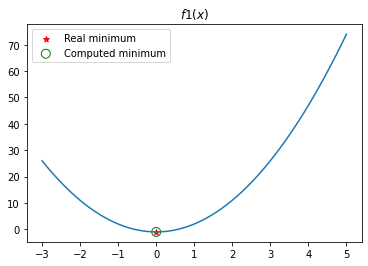

In [4]:
def f1(x): return 3*x**2 - 1

a, b = -3, 5
interval_length = 0.001
epsilon = 0.0001

start_time = timeit.default_timer()
lower_bound, upper_bound, total_it = dichotomic_search(f1, a, b, interval_length, epsilon)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at ({lower_bound:.4f}, {upper_bound:.4f}) after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = (upper_bound-lower_bound)/2
real_minimum = 0.0

x = np.linspace(a, b, 1000)
plt.plot(x, f1(x))
plt.title(r"$f1(x)$")
plt.scatter(real_minimum,f1(real_minimum), color="red", marker="*", label="Real minimum")
plt.scatter(computed_minimum, f1(computed_minimum), s=80, facecolors='none', edgecolors='g', label="Computed minimum")
plt.legend(loc = 'best')
plt.show()

## Búsqueda Sección Áurea

A continuación, se muestra a través del mismo ejemplo, el problema de minimización de búsqueda sección aurea utilizando la función *golden_search* implementado en *search_methods.py*.

Minimum value at (-0.0006, 0.0003) after 19 iteration computed in 0.0001 seconds.


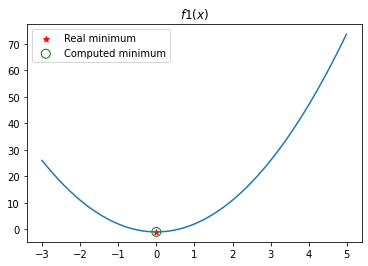

In [5]:
a, b = -3, 5
interval_length = 0.001

start_time = timeit.default_timer()
lower_bound, upper_bound, total_it = golden_search(f1, a, b, interval_length)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at ({lower_bound:.4f}, {upper_bound:.4f}) after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = (upper_bound-lower_bound)/2
real_minimum = 0.0

x = np.arange(a, b, 0.01)
plt.plot(x, f1(x))
plt.title(r"$f1(x)$")
plt.scatter(real_minimum,f1(real_minimum), color="red", marker="*", label="Real minimum")
plt.scatter(computed_minimum, f1(computed_minimum), s=80, facecolors='none', edgecolors='g', label="Computed minimum")
plt.legend(loc = 'best')
plt.show()

# Tarea 2
- Codificar el método de Hooke y Jeeves.
- Codificar el método del gradiente

In [6]:
from opt_search import HJ_search

## Método de Hooke y Jevees

Se muestra, a través de un ejemplo, el método de optimización de Hooke y Jevees implementado como *HJ_search* en *search_methods.py*. 

Para la búsqueda del $\lambda$ mínimo en los pasos 1 y 2 del algoritmo visto en clase, se utiliza una variante del método que utiliza dos parámetro complementarios: $\beta$ y $\alpha$ que miden la tasa de reducción y el factor de aceleración del algorito respectivamente.

La función a minimizar es la siguiente parábola aplanada:

$$f_2(x)= (x_1-2)^4 + (x_1 - 2x_2)^2$$

In [7]:
def f2(x):
    return (x[0]-2)**4 + (x[0] - 2*x[1])**2

Minimum value at [2.09633789 1.04868164] after 56 iteration computed in 0.0023 seconds.


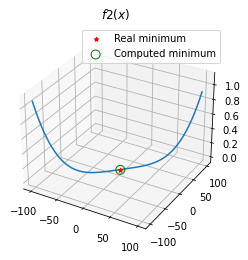

In [8]:
start_time = timeit.default_timer()
xk_min , total_it = HJ_search(f2, x0 = np.array([0, 3]), lambd = 3.3)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at {xk_min} after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = xk_min
real_minimum = np.array([2.0, 1.0])

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = np.linspace(-100, 100, 1000)
yline = np.linspace(-100, 100, 1000)
x = np.array(list(zip(xline,yline)))
zline = list(map(f2, x))

ax.plot3D(xline, yline, zline)
plt.title(r"$f2(x)$")
ax.scatter3D(real_minimum[0], real_minimum[1], f2(real_minimum), color="red", marker="*", label="Real minimum")
ax.scatter3D(computed_minimum[0], computed_minimum[1], f2(computed_minimum),  color="green", s = 80, facecolor = 'none', marker="o", label="Computed minimum")
plt.legend(loc = 'best')
plt.show()

# Tarea 3

- Codificar el método de Newton (multivariante).


In [9]:
from opt_search import newton_search

## Método Newton (multivariante)
Se prueba el método de optimización de Newton multivariante implementado como *newton_search* en *search_methods.py*, utilizando de nuevo la función $f_2$ a minimizar.

Para ello, es necesario calcular el Hessiano de $f_2$:

$$\nabla {f_2}(x) = (4(x_1-2)^3+2(x_1-2x_2), -4(x_1-2x_2))$$


$$H f_2(x) = \begin{pmatrix} 12(x-2)^2+2 & -4\\
                            -4 & 8
                \end{pmatrix}$$


In [10]:
def grad_f2(x):
    return np.array([4*(x[0]-2)**3 + 2*(x[0]-2*x[1]), -4*(x[0]-2*x[1])], dtype=np.float64)
    

def H_f2(x):
    return np.matrix([[12*(x[0]-2)**2 + 2, -4], [-4, 8]], dtype=np.float64)

Minimum value at [1.99997653 0.99998827] after 56 iteration computed in 0.0024 seconds.


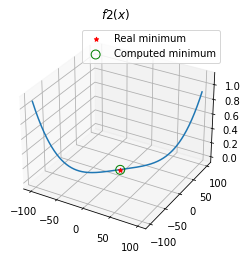

In [11]:
start_time = timeit.default_timer()
xk_min, it = newton_search(grad_f2, H_f2, x0 = np.array([0, 3]))
search_time = timeit.default_timer() - start_time

print(f'Minimum value at {xk_min} after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = xk_min
real_minimum = np.array([2.0, 1.0])

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = np.linspace(-100, 100, 1000)
yline = np.linspace(-100, 100, 1000)
x = np.array(list(zip(xline,yline)))
zline = list(map(f2, x))

ax.plot3D(xline, yline, zline)
plt.title(r"$f2(x)$")
ax.scatter3D(real_minimum[0], real_minimum[1], f2(real_minimum), color="red", marker="*", label="Real minimum")
ax.scatter3D(computed_minimum[0], computed_minimum[1], f2(computed_minimum),  color="green", s = 80, facecolor = 'none', marker="o", label="Computed minimum")
plt.legend(loc = 'best')
plt.show()

# Tarea 4
- Codificar el método de Davidon-Fletcher-Powell.

In [12]:
def DFP(func,
        grad, 
        x0,
        lr = 1.0,
        epsilon = 1e-3,
        max_iter = 100):
    
    xk = x0.copy()
    n = len(xk)
    Dk = np.eye(n)*0.001
    converged = False
    
    for it in range(max_iter):
        if (np.linalg.norm(xk) < epsilon):
            converged = True
            break
            
        dj = -grad(xk).T@Dk
        xk_current = xk + lr*dj

        q = grad(xk_current)-grad(xk)
        
        p = lr*dj
        Dk = Dk + (p@p.T)/(q.T@p) - (Dk@q@q.T*Dk)/(q.T@Dk@q)
        
        xk = xk_current

    if not converged:
        print("DFP search has divergenced.")

    return xk, it

In [13]:
DFP(f2, grad_f2, x0 = np.array([1,1]))

DFP search has divergenced.


(array([1.14288193, 1.13288193]), 99)